In [1]:
import datetime
import requests
import ccxt
import numpy as np
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from dataset import Dataset
from binance_utils import get_all_coins, get_all_symbols
from binance import Client
from dotenv import dotenv_values
from scipy.optimize import curve_fit

In [273]:
def log_func(x, a, b):
    return 10 ** (a * np.log10(x) + b)

In [304]:
btc = pd.read_csv('data/bitcoin_2010-07-17_2024-06-28.csv', delimiter=',')[['End', 'Close']].iloc[::-1]

In [305]:
btc = btc.set_index(btc['End'].map(pd.to_datetime))
btc = btc.drop(columns=['End'])
btc.index.name = 'time'

In [306]:
x = np.arange(1, btc.shape[0] + 1)
y = btc['Close'].to_numpy()
y_log = np.log10(y)
y_log = (y_log - y_log.min()) / (y_log.max() - y_log.min()) * (y.max() - y.min()) + y.min()

In [307]:
params, covariance = curve_fit(log_func, x, y)
a, b = params
y_fit = log_func(x, a, b)

In [308]:
top_thr = y_fit * 2.5

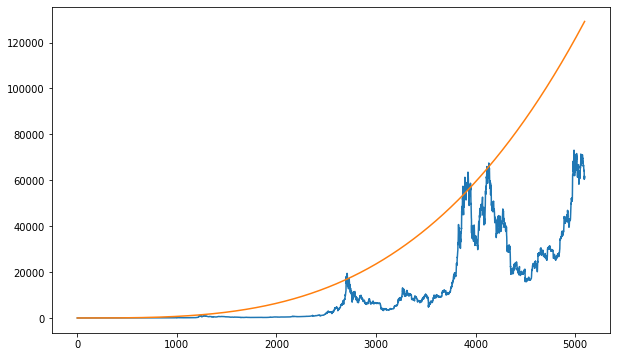

In [309]:
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.plot(top_thr)
plt.show()

In [326]:
y_fit_ext = log_func(np.arange(1, btc.shape[0] + 301), a, b)
top_thr_ext = y_fit_ext * 2.5

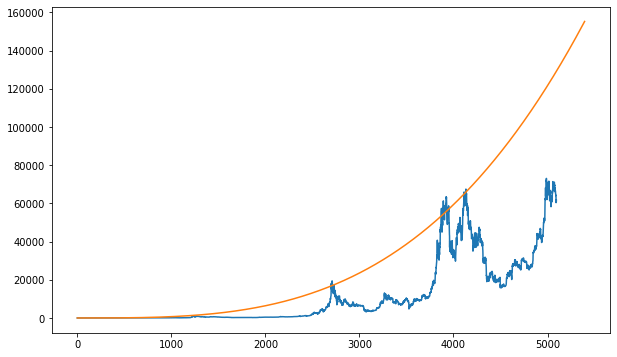

In [327]:
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.plot(top_thr_ext)
plt.show()

In [328]:
top_thr_ext[-1]

155264.65718277174

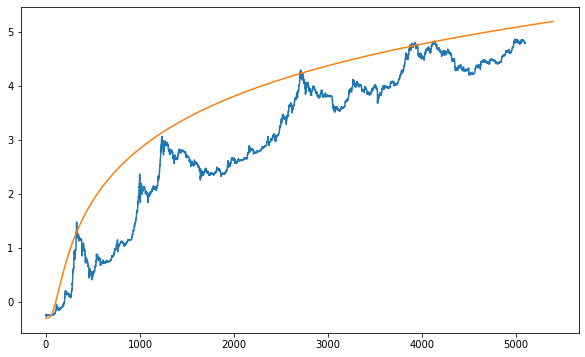

In [329]:
plt.figure(figsize=(10, 6))
plt.plot(np.log10(y + 0.5))
plt.plot(np.log10(top_thr_ext + 0.5))
plt.show()